# Transformers!

## The issue with RNNs 
Vanilla RNNs, LSTMs, and GRUs are **sequential in nature**. 

They are inefficient as we cannot take full advantage of vectorization and **parallel GPUs**. 

## Attention? 

When humans read or look, they **attend** on some regions within the input! 

This replaces the recurring nature of the models. 

## Single Attention Mechanism 

Attention-based pooling for classifying tweets 

--> We want to use it to pool the word embeddings of a tweet into a **tweet embedding**. 

If we sum/average the word embeddings, we assume all words have a same importance! 

1. Take the embeddings of the tokens we have ($t_1, t_2, ... , t_n$ to $e_1, e_2, ... , e_n$)
2. Pass into attention layer and yield a **single scalar** for each token. 

This is like the "importance score" of each of the input tokens

This is $s_1, s_2, ... s_n$

3. Pass these into softmax; summing them will equal 1

Now this becomes $\alpha_1, \alpha_2, ... , \alpha_n$

(Attention scores)

4. Take each embedding, multiply by normalized scores, sum them up 

$$ e = \sum \alpha_i e_i$$

5. Pass the sum into FC




## Attention in RNNs
The first version was in RNNs, done with machine translation 

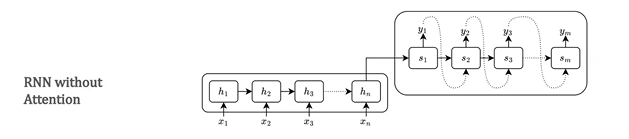


### Without Attention? 
Essentially have 2 RNNs 

First RNN processes input, gets you final hidden state of $h_n$, condenses all information about the first sentence. 

Second RNN is a generator, start with BOS, ...., EOS 

If we want the model to generate some specific thing, we take the hidden state from encoder and initialize the hidden state of decoder. 

We use a pair of English and French. 

Issue? If the sentence is long, you lose information. 

### With Attention (Cross-attention)

Rather than passing last hidden state to the decoder, 

In each step of the decoder, we take the input hidden state from the previous state, and compare it with each of the hidden states in the encoder. 

So, 

$FC(s_{m-1} || h_1)$
 
$FC(s_{m-1} || h_2)$

$FC(s_{m-1} || h_3)$

$FC(s_{m-1} || h_n)$

Then pass through a softmax 

This gets you an $\alpha$ per hidden state!

$c_m = \sum \alpha_i h_i $


This allows you to see which english word should have **higher weight**, and helps "align" the two languages. 

## Attention Score Computation 

Suppose we have two embeddings 

We can use different methods 
- Dot Product 
- Cosine Similarity 
- Bilinear 
- MLP 

## Transformers! 

Let's say we have an input sequence consisting of tokens 

Sentence: $x_1, x_2, ..., x_n$

The main goal is to contextualize each of the input embeddings. 

GLoVE embeddings are STATIC!   

If you have a sentence, you need to update the embedding of each of the words based on the embedding of all the words in that sentence. 

For each input sentence, we have some initial embedding per word, but we want to update this embedding to reflect the current context. 

So you will compute the attention scores/alphas for 

(x1, x1), (x1, x2), (x1, x3), ..... 

You update the embedding of the word 



## Author definition attention 

This is similar to a dictionary. 

You have keys, values, query 

We want to create a dictionary that works for embeddings. 

The difference in Python dictionaries is that, you can have an exact match. 

But for transformers, it's a continuous sentence. You cannot just directly compare the query and keys. 

Apply **dot product** between query and each of the keys, and return the value of the key with the highest dot product score with the query. 

Note that since the dot product is not strict. 

Let's say you get dot products of 0.9 and 0.3, then grab just the 0.9, you are losing information! 

We'll just return a **weighted average** of the values. 

$$ \sum Sim(q, K_i) V_i $$

The goal now is to update the embeddings of each token based on the rest of the tokens in that sentence. 

The improve the capacity, we introduce 3 more fully connected layers at the start 

Q: Query Linear Layer 

K: Key Linear Layer 

V: Value Linear Layer 

You'll pass your entire sequence into each of these layers to go from 

$$
x_1, x_2, ... , x_n 
$$ 

to 

$$
q_1, q_2, ... q_n
$$

$$
k_1, k_2, ... k_n
$$

$$
v_1, v_2, ... v_n
$$

Or to sum it up 

$$ 
attention(q, \textbf{k},\textbf{v}) = \sum_i similarity(q, k_i) \times v_i
$$ 

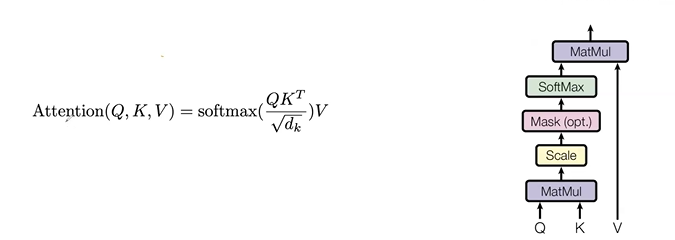

Be careful that **dimension of key must match the dimension of query**

$ Q = n \times d_k$ and $K^T = d_k \times n$

Now instead of doing this word by word, we can do this **in parallel** for all the words! The output of this module 

Each row is the updated embeddings of each word in the sequence. 



## Multi-Head Attention 

To improve the performance 

1. Divide the representation space to h sub-spaces 
2. Run parallel linear layers and attentions 
3. Concatenate them back to form the original space

This is an **Ensemble**. 

Having a bunch of smaller models usually outperforms 

## Transformer Architecture 

### Transformer Encoder 

Each encoder layer consists of 
1. Multi-head self-attention sub-layer 
2. Fully-connected sub-layer 
3. Residual connection around each of the two sub-layers, followed by layer normalization 

The output of the MHA is added and normalized through the skip connection. 

Then, it is passed into a Feed Forward network 

- Linear 1 -> ReLU -> Linear 2 


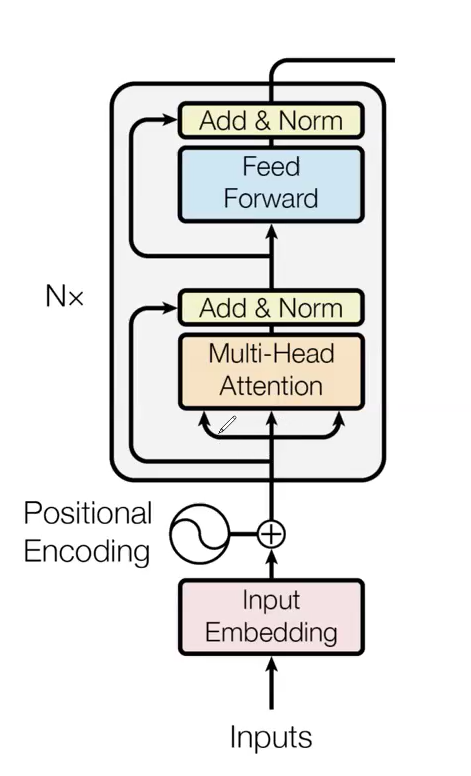

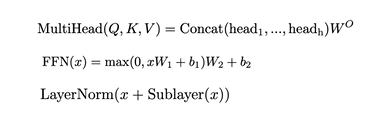


## Positional Encoding 

The model does **NOT** have recurrent or convolutional layers! It does not take into account the order of sequence 

We use **positional encoding** to make sure fo the order which allows the model to easily learn to attend by relative positions

Through summation, we add an **additional position embedding** to represent the position. 

So the input is $x_1 + p_1$, $x_2 + p_2$, ...

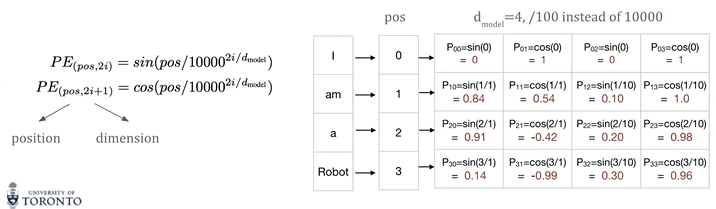

$d_{model}$ is input embedding size

Now let's say $d_{model}$ is 4 and we use 100 for 10000

You compute this for **every single token** with respect to the **rest of the tokens!**

## Compare with RNNs? 

RNN
- Struggling with long range dependncies 
- Gradient vanshing, large # of training steps 
- Recurrence prevent parallel computaiton 

Transformer 
- Facilitate long range dependencies 
- Less likely to have gradient vansihing and explosino problem 
- Fewer training steps 
- No recurrence, facilitates parallel computation 

## Transformers for Language Modeling 

We can use a self-supervised objective such as predicting the next work to learn embeddings over tokens. 

**Word2Vec/GloVe:**
- Learn static embeddings 
- One embedding for all senses

**RNNs/Transformers**
- Learn CONTEXTUAL embeddings 
- Embedding of a same word CHANGES according to the sentence it appears in

## BERT Model 
1. Token Embedding 
2. Sentence Embedding --> Just says which sentence the token belongs to. 

Sentence 0: Added vector of 0s 

Sentence 1: Added vector of 1s

3. Transformer Positional Encoding 

Then take an element-wise sum 

It is trained by taking in two sentences! 



[CLS] --> Same as BOS

[SEP] --> End of a sentence

### Task 1: Masked Word Prediction 

Replace 15% of words at random with [MASK] token 

Using the context of non-masked words, **predict original value** of [MASK] token

Loss is computed on JUST the masked word

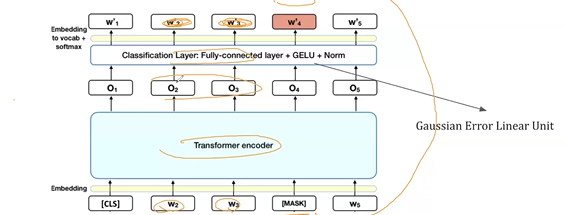

### Task 2: Next Sentence Prediction 
Given two sentences, predict if they **appear together**. 

Create 50% positive and 50% negative pairs of sentences

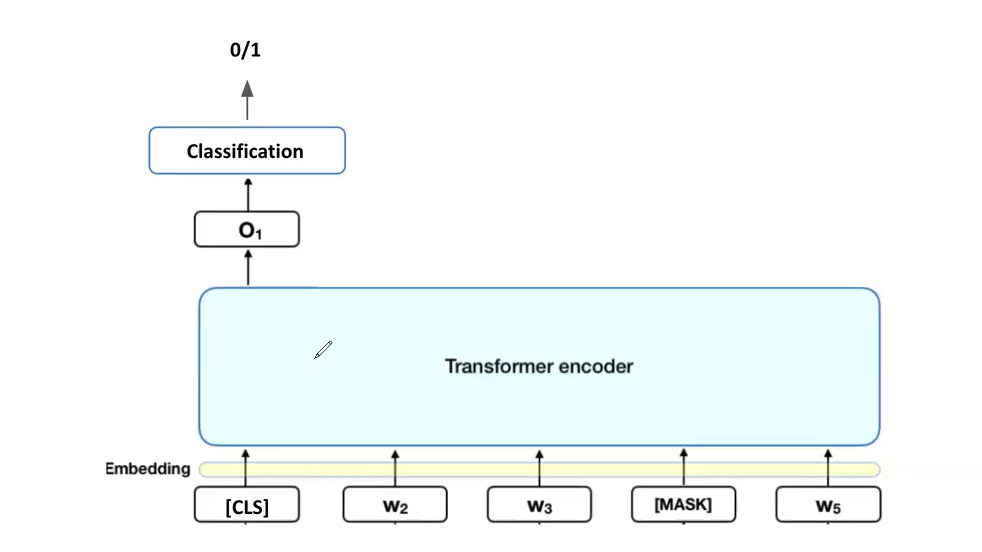

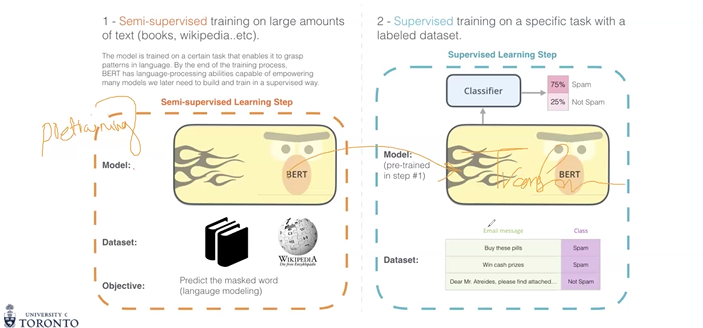

## Transformers for Computer Vision (ViT)

Same transformer, but this time pass images in 

1. Chunk images 
2. Flatten patches to get **embedding per patch**
3. Pass into transformer encoder

Now these are better than CNNs, though parameters wise this is not very efficient. 